## Interactive logistic plot

## $$x_{n+1} = rx_{n}(1-x_{n})$$

In [1]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib nbagg

<IPython.core.display.Javascript object>


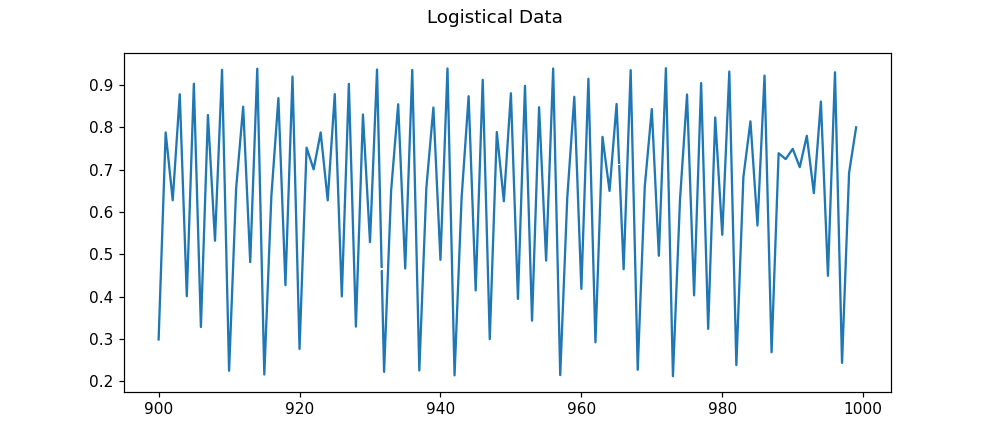

interactive(children=(FloatSlider(value=3.67, description='rate(r)', max=4.0, step=0.01), FloatSlider(value=0.…

In [2]:
n = np.arange(0,1001,1)
x = np.zeros(1001)

fig,ax0 = plt.subplots(figsize = (9,4))
ax0.set_ylim(0,1)
plt.suptitle('Logistical Data')

def update_plot(rate,xi):
    
    ax0.clear()
    
    x[0] = xi
    r = rate
    
    for i in n[:1000]:
        x[i+1] = r*x[i]*(1-x[i])
        
        
    ax0.plot(n[900:1000],x[900:1000])

rate = widgets.FloatSlider(min = 0, max = 4, value = 3.67, step = 0.01, description = 'rate(r)')
xi = widgets.FloatSlider(min = 0, max = 1, value = .5, step = 0.01, description = 'ini. Pop.:$x_{i}$')

widgets.interactive(update_plot,rate=rate,xi=xi)

<IPython.core.display.Javascript object>


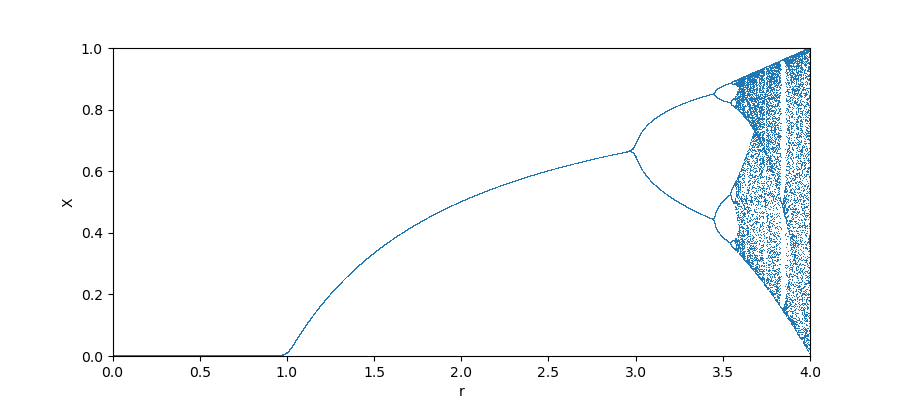

In [45]:
def logistic_eq(r,x):
    return r*x*(1-x)

fig,ax1 = plt.subplots(figsize = (9,4))
def bifurcation_diagram(seed, step, r_min, n_skip=100, n_iter=10):
    print("Starting with x0 seed {0}, skip plotting first {1} iterations, then plot next {2} iterations.".format(seed, n_skip, n_iter));
    # Array of r values, the x axis of the bifurcation plot
    R = []
    # Array of x_t values, the y axis of the bifurcation plot
    X = []
    
    # Create the r values to loop. For each r value we will plot n_iter points
    r_range = np.linspace(r_min, 4, int(1/step))

    for r in r_range:
        x = seed;
        # For each r, iterate the logistic function and collect datapoint if n_skip iterations have occurred
        for i in range(n_iter+n_skip+1):
            if i >= n_skip:
                R.append(r)
                X.append(x)
                
            x = logistic_eq(r,x);
    # Plot the data    
    ax1.plot(R, X, ls='', marker=',')
    ax1.set_ylim(0, 1)
    ax1.set_xlim(r_min, 4)
    ax1.set_xlabel('r')
    ax1.set_ylabel('X')
    plt.show()

In [46]:
def update_plot(seed, step, r_min):
    
    ax1.clear()
    bifurcation_diagram(seed, step, r_min)
    
seed = widgets.FloatSlider(min = 0.01, max = 1, value = .2, step = 0.001, description = '$x_{i}$')
# n_skip = widgets.FloatSlider(min = 40, max = 140, value = 100, step = 5, description = 'skipped_iteration')
# n_iter = widgets.FloatSlider(min = 10, max = 30, value = 10, step = 2, description = 'values_plotted')
step = widgets.FloatSlider(min = 0.0001, max = .02001, value = .0001, step = .0004, description = 'step_size')
r_min = widgets.FloatSlider(min = 0, max = 3.5, value = 0, step = .25, description = 'r_min')

widgets.interactive(update_plot,seed=seed,step=step,r_min=r_min)

interactive(children=(FloatSlider(value=0.2, description='$x_{i}$', max=1.0, min=0.01, step=0.001), FloatSlide…

## Feigenbaum Delta

In [5]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [378]:
m = np.zeros(18)
delta = np.zeros(18)
x = np.zeros(9)
dx = np.zeros(9)

# initialization
delta[0] = 5 
m[0] = 2
m[1] = 1 + np.sqrt(5)
x[0] = 0.5

for n in range(2,18):
    m[n] = m[n-1] + (m[n-1]-m[n-2])/delta[n-2]
    x = np.zeros(2**n+1)
    dx = np.zeros(2**n+1)
    mu = m[n]
    for i in range(0,6):
        x[0] = 0.5
        dx[0] = 0
        for j in range(0,(2**n)):
            x[j+1] = mu*x[j]*(1-x[j])
            dx[j+1] = x[j]*(1-x[j]) + mu*dx[j]*(1-2*x[j])
        mu = mu - (x[2**n]-0.5)/dx[2**n]
    m[n] = mu
    delta[n-1] = (m[n-1]-m[n-2])/(m[n]-m[n-1])
    print('delta[%g]=%0.11f'%(n-1,delta[n-1]))

delta[1]=4.70894301354
delta[2]=4.68077099801
delta[3]=4.66295961111
delta[4]=4.66840392592
delta[5]=4.66895374097
delta[6]=4.66915718150
delta[7]=4.66919100219
delta[8]=4.66919946318
delta[9]=4.66920118504
delta[10]=4.66920194323
delta[11]=4.66919806246
delta[12]=4.66919719043
delta[13]=4.66932780619
delta[14]=4.66882266850
delta[15]=4.67044652557
delta[16]=4.65399590353


## Newton's Fractal

In [150]:
import matplotlib.pyplot as plt
import numpy as np

In [152]:
rootlist = {}

def npe1(x):
    return (x**2-1)*(x**2+1)/(2*x*(x**2-1)+2*x*(x**2+1))
rootlist['npe1'] = [-1, 1, -1j, 1j]

def npe2(x):
    return (x**3-1)/(3*x**2)
rootlist['npe2'] = [-.5-0.8660254037844386j,-.5+0.8660254037844386j, 1]

interval_left = -2.1
interval_right = 2.1
interval_down = -2.1
interval_up = 2.1

num_x = 1000
num_y = 1000

prec_goal = 1.e-11
nmax = 300

xvals = np.linspace(interval_left, interval_right, num=num_x)
yvals = np.linspace(interval_down, interval_up, num=num_y)

x,y = np.meshgrid(xvals,yvals)

In [155]:
def id_root(zl,rlist,m,n):
    findgoal = 1.e-10 * np.ones(shape=(m,n))
    rootid = -1 * np.ones(shape=(m,n))
    for r in rlist:
        rootid = np.where(np.abs(zl-r* np.ones(shape=(m,n))) < findgoal, np.ones(shape=(m,n)) * rlist.index(r), rootid)
            
    return rootid



def plot_newton_fractal(func_string, perfom_shading=False):
    
    z = x + 1j*y
    reldiff = np.ones(shape=(num_x,num_y))
    counter = np.zeros(shape=(num_x,num_y),dtype=int)
    
    overallcounter = 0
    prec_goal_list = np.ones(shape=(num_x,num_y)) * prec_goal
    
    while np.any(reldiff.T.ravel()) > prec_goal and overallcounter < nmax:
        
        diff = eval(func_string+'(z)')
        reldiff = np.abs(diff/z)
        z = z - diff
        
        counter = counter + np.greater(reldiff.T, prec_goal_list )
        overallcounter += 1
    nroot = id_root(z.T,rootlist[func_string],num_x,num_y).astype(int)
    if perfom_shading == True:
        nroot = nroot - 0.99*np.log(counter/np.max(counter))
    
    nroot_contour = nroot.T
    # create an imshow plot 
    plt.figure()
    
    #label the axes
    plt.xlabel("$Re(z)$", fontsize=16)
    plt.ylabel("$Im(z)$", fontsize=16)
    
    # plots the matrix of data in the current figure. Interpolation isn't wanted here.
    # Change color map (cmap) for various nice looks of your fractal
    plt.matshow(nroot_contour, fignum=0, interpolation='none', origin='lower', cmap='hot')
    
    # remove ticks and tick labels from the figure
    plt.xticks([])
    plt.yticks([])

<IPython.core.display.Javascript object>


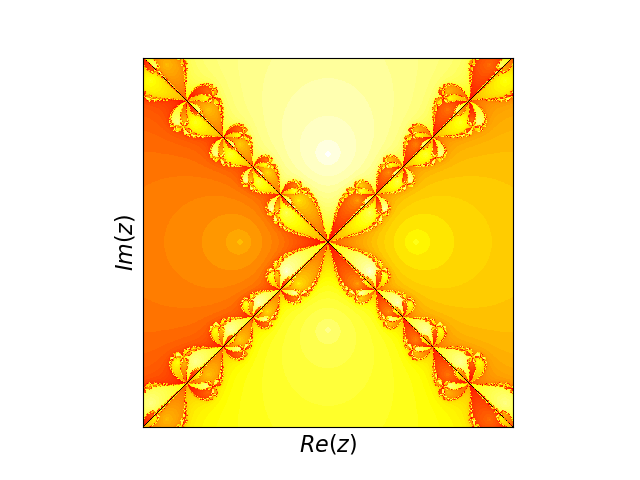

In [157]:
plot_newton_fractal('npe1',perfom_shading=True)        

<IPython.core.display.Javascript object>


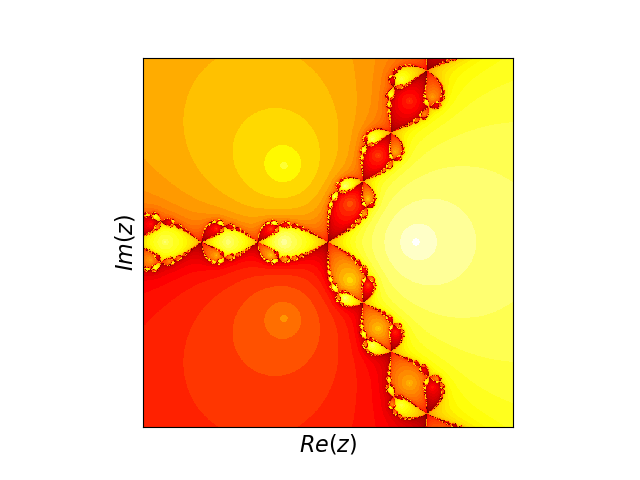

In [159]:
plot_newton_fractal('npe2',perfom_shading=True)        

## Solution of Laplace Equation (Incomplete)

In [384]:
import numpy as np
import scipy as sc
from scipy.sparse import diags
import sympy as sm
import matplotlib.pyplot as plt
from IPython.display import display,Math

In [385]:
## define physical parameters

Lx = 1; Ly = 1
Nx = 5; Ny = 5 # No of sectors/blocks
nx = Nx + 1; ny = Ny + 1 # No of data points
dx = Lx/Nx; dy = Ly/Ny
x = np.arange(0,Lx+dx,dx); y = np.arange(0,Ly+dy,dy)

boundary_index = [np.arange(1,nx+1), np.arange(1,nx*ny-nx+1+1,nx), np.arange(nx*ny-nx+1,nx*ny+1), np.arange(nx, nx*ny+1,nx)] # bottom, left, top, right

diagonals = np.concatenate((-np.ones(shape=(nx*ny,2)), -4*np.ones(shape=(nx*ny,1)), -np.ones(shape=(nx*ny,2))), axis = 1)
k = [-6, -1, 0, 1, 6]
A = diags(diagonals, k, format = 'csc')

ValueError: Different number of diagonals and offsets.

In [ ]:
diagonals = [-np.ones(9),-np.ones(15), 4*np.ones(16), -np.ones(15), -np.ones(9)]
k = [-6,-1,0,1,6]

A = diags(diagonals,k,format = 'csc')
A.todense()

## Linear Algebra

Three pillars of Linear Algebra. 

$\begin{array}{|c|c|c|}
\hline
I & II & III \\
\hline
\textbf{Subspaces} & \textbf{Transformation} & \textbf{Inner Product}\\
\hline
\textbf{All that's related to } & \textbf{Operations that take a vector }&\textbf{The notion of Length}\\
\textbf{counting Dimensions & Subspaces} & \textbf{and return a vector} &\textbf{Central to all of applied Mathematics}\\
 & & \tiny{\textbf{Geometric vectors,Polynomials,stresses,signals,displacement,strains,currents,}}\mathcal{R}^{n}\\
\hline
\textbf{Linear Dependence & Independence} & \textbf{Linear Property & Linear Transformation}&\\
\hline
\textbf{Solution of Linear System, Ax=b} & \textbf{Central Concept of Eigen Values Ax =}\lambda\textbf{x} &\\
\hline
\textbf{Concept of Particular Solution } & \textbf{Reflections & Projections}&\\
\textbf{& General Solution} & \textbf{Derivative as linear transformation}&\\
\hline
\textbf{Linear Decomposition} & \textbf{Linear Algebra Ideas are applicable }&\\
 & \textbf{to all kinds of Objects} & \\
 \hline
\textbf{Matrix Multiplication} & &\\
\hline
\textbf{Null Spaces} & &\\
\hline
\end{array}$

Length is something that we can measure with tape measure

Elements of $\mathcal{R}^{3}$ are triplets of numbers

Square root of squares of the numbers are length.

We have break that association

Treat all objects with their own terms

A set of numbers/troplets of numbers are just that because can't take tape measures to them

In general, vectors in $\mathcal{R}^{n}$ didn't have length and angle that we have tried to indicate so far 

Polynomials do not have length and angles. Such things may be ridiculous to think but are not

One reason to bring the concept of lengths is proximity 

This solution is close to that solution

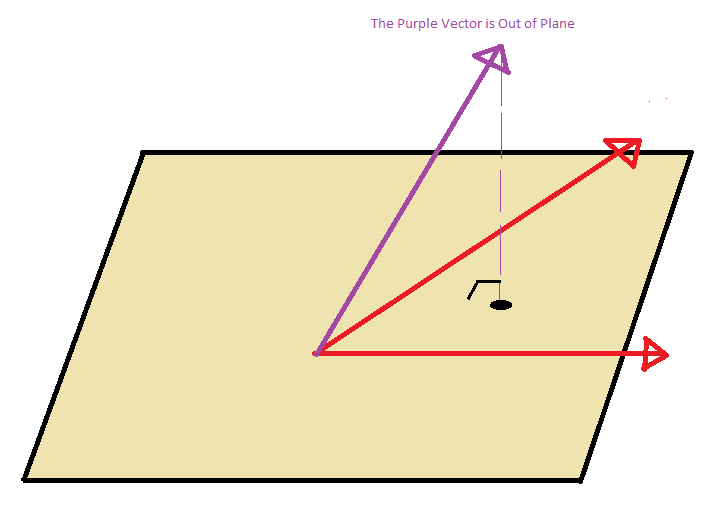

The red vectors and purple vector are not in same plane

So it not possible to decompose the purple vector into the red vector or make a linear combination of red vectors to create 

the purple vector. But we can get an approximate that will be closest to orthogonal projection to red vector plane. Closest 

means length(What is the concept of length?) 

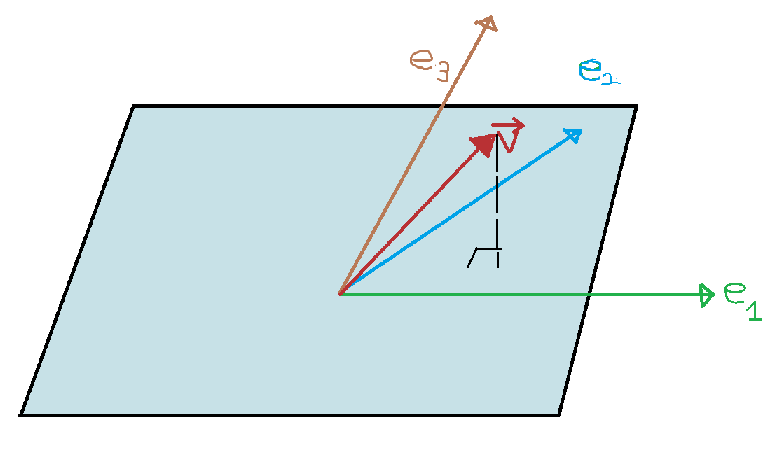

Let's express $\overrightarrow{V}$ with three non orthogonal basis $e_{1},e_{2},e_{3}$. So,

$$\overrightarrow{V} = v_{1}e_{1} + v_{2}e_{2} + v_{3}e_{3}$$

$\begin{align}
e_{1}\cdot \overrightarrow{V} &= e_{1}\cdot(v_{1}e_{1} + v_{2}e_{2} + v_{3}e_{3})\\
                              &= e_{1}\cdot(v_{1}e_{1})+ e_{1}\cdot(v_{2}e_{2}) + e_{1}\cdot(v_{3}e_{3})\\
                              &= v_{1}(e_{1}\cdot e_{1}) + v_{2}(e_{1}\cdot e_{2}) + v_{3}(e_{1}\cdot e_{3})\\
e_{2}\cdot \overrightarrow{V} &= v_{1}(e_{2}\cdot e_{1}) + v_{2}(e_{2}\cdot e_{2}) + v_{3}(e_{2}\cdot e_{3})\\
e_{3}\cdot \overrightarrow{V} &= v_{1}(e_{3}\cdot e_{1}) + v_{2}(e_{3}\cdot e_{2}) + v_{3}(e_{3}\cdot e_{3})\\
\end{align}$

$$e_{i}\cdot\overrightarrow{V} = v_{j}(e_{i}\cdot e_{j})$$

$$v_{j} = \frac{e_{i}\cdot\overrightarrow{V}}{e_{i}\cdot e_{j}}, \quad \text{ for non-orthonormal basis}$$

$$v_{i} = \frac{e_{i}\cdot\overrightarrow{V}}{e_{i}\cdot e_{i}}, \quad \text{ for orthogonal basis}$$

$$v_{i} = e_{i}\cdot\overrightarrow{V}, \quad \text{ for orthonormal basis}$$

for polynomials same analysis works

Lets consider's a system 

$\begin{array}{cccc}
\begin{bmatrix}
a & b & c\\
d & e & j\\
f & g & h\\
\end{bmatrix} & \begin{bmatrix}
x\\
y\\
z\\
\end{bmatrix}& = & \begin{bmatrix}
m\\
n\\
o\\
\end{bmatrix}
\end{array}$

which can be written as linear combination of $[a \quad d \quad f]\quad [b \quad e \quad g]\quad [c\quad e\quad h]$ vectors of amount x,y & z.


$\begin{array}{cccccccc}
\begin{bmatrix}
a\\
d\\
f\\
\end{bmatrix} & x & + & \begin{bmatrix}
b\\
e\\
g\\
\end{bmatrix} & y & + & \begin{bmatrix}
c\\
j\\
g\\
\end{bmatrix} & z & = & \begin{bmatrix}
m\\
n\\
o\\
\end{bmatrix}
\end{array}$

Now another system 

$\begin{array}{cccc}
\begin{bmatrix}
a & b & c\\
d & e & j\\
f & g & h\\
\end{bmatrix} & \begin{bmatrix}
x\\
y\\
\end{bmatrix}& = & \begin{bmatrix}
m\\
n\\
o\\
\end{bmatrix}
\end{array}$

$\begin{array}{ccccc}
\begin{bmatrix}
a\\
d\\
f\\
\end{bmatrix} & x & + & \begin{bmatrix}
b\\
e\\
g\\
\end{bmatrix} & y & +\text{What to do with 3rd column } = & \begin{bmatrix}
m\\
n\\
o\\
\end{bmatrix}
\end{array}\therefore$ No solution Not a linear system

$\begin{array}{cccc}
\begin{bmatrix}
a & b\\
d & e\\
f & g\\
\end{bmatrix} & \begin{bmatrix}
x\\
y\\
\end{bmatrix}& = & \begin{bmatrix}
m\\
n\\
o\\
\end{bmatrix}
\end{array}$

$\begin{array}{ccccc}
\begin{bmatrix}
a\\
d\\
f\\
\end{bmatrix} & x & + & \begin{bmatrix}
b\\
e\\
g\\
\end{bmatrix} & y & = & \begin{bmatrix}
m\\
n\\
o\\
\end{bmatrix}
\end{array}$ 


$\therefore$ May have solution depending on if 
$\begin{bmatrix} m\\ n\\ o\\ \end{bmatrix}$ are in the same plane with $\begin{bmatrix} a\\ d\\ f\\ \end{bmatrix}$ and $\begin{bmatrix} b\\ e\\ g\\ \end{bmatrix}$

So we are interested in the closest can get to $\begin{bmatrix} m\\ n\\ o\\ \end{bmatrix}$

So how can i find the distance between $\begin{array}{cccc}
\begin{bmatrix}
a\\
d\\
f\\
\end{bmatrix} & x & + & \begin{bmatrix}
b\\
e\\
g\\
\end{bmatrix} & y
\end{array}$ and $\begin{bmatrix}
m\\
n\\
o\\
\end{bmatrix}$. The usual square root of square is only one solution. There are many!!!

What is length for polynomials? Since linear algebra applies for everything. It's not done by defining length directly but with the concept of inner product for geometric vector turns into scaler product

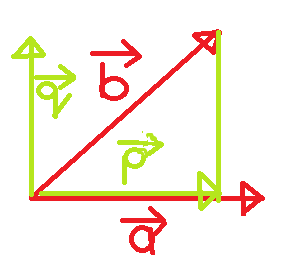

$\overrightarrow{a}\cdot\overrightarrow{b} = \text{len}(\overrightarrow{a})\text{len}(\overrightarrow{b})\cos(\theta)$

So a few points

1) length and angles existed before inner product

2) The expression is meaningless

3) It is the right combination because we can express everything with it along with the two other property adding and scaling(multiplying)

$a = \sqrt{\text{len}(\overrightarrow{a})\cdot\text{len}(\overrightarrow{a})}$ definition for length corresponding to any inner product

An example of inner product for polynomial is integration. Polymonials can have length!!! 

$\Large{\overrightarrow{p} = \frac{\overrightarrow{a}\cdot\overrightarrow{b}}{\overrightarrow{b}\cdot\overrightarrow{b}}\overrightarrow{b}}$

$\Large{\overrightarrow{q} = \overrightarrow{a} - \frac{\overrightarrow{a}\cdot\overrightarrow{b}}{\overrightarrow{b}\cdot\overrightarrow{b}}\overrightarrow{b}}$

### Inner Product has three properties

1) (a,b) = (b,a) Commutative Porperty

2) (a,$\beta$b+c) = $\beta$(a,b) + (a,c) Multiplicative Distributive Property

3) (a,a) > 0, for all $a\neq 0$ Positive Definite Property The most interesting one(another term semi-definite)

The concept of gaussian Integration and Fourier series comes from Inner Product!!!  

#### Orthogonal Polynomials

In mathematics, an orthogonal polynomial sequence is a family of polynomials such that any two different polynomials in the sequence are orthogonal to each other under some inner product.

The most widely used orthogonal polynomials are the classical orthogonal polynomials, consisting of the Hermite polynomials, the Laguerre polynomials and the Jacobi polynomials. The Gegenbauer polynomials form the most important class of Jacobi polynomials; they include the Chebyshev polynomials, and the Legendre polynomials as special cases.

### Gram-Schmidt Orthogonalization

A technique for a set of nonorthogonal vectors with respect to something in the product to make it orthogonal.

Three non-orthogonal object $\{a,b,c\}$ which we will convert to $\{a_{1},b_{1},c_{1}\}$ orthogonal object.

First we will make $a = a_{1}$ as the reference.

To transform b we use gram-schmidt orthogonalization

$\large{b_{1} = b - \frac{(b,a_{1})}{(a_{1},a_{1})}a_{1}}$

Now we will have to make $c$ orthogonal to $b_{1}$ & $a_{1}$

Using the same procedure first we make $c$ orthogonal to $b_{1}$

$\large{c_{1}^{'} = c - \frac{(c,b_{1})}{(b_{1},b_{1})}b_{1}}$

Making $c_{1}^{'}$ orthogonal to $a_{1}$

$\large{c_{1} = c_{1}^{'} - \frac{(c_{1}^{'},a_{1})}{(a_{1},a_{1})}a_{1}}$

$\large{c_{1} =  c - \frac{(c,b_{1})}{(b_{1},b_{1})}b_{1} - \frac{\big(c-\frac{(c,b_{1})}{(b_{1},b_{1})}b_{1},a_{1}\big)}{(a_{1},a_{1})}a_{1}}$

$\bigg(c-\frac{(c,b_{1})}{(b_{1},b_{1})}b_{1},a_{1}\bigg) = (c,a_{1}) - \bigg(\frac{(c,b_{1})}{(b_{1},b_{1})}b_{1},a_{1}\bigg)$

Now $\large{\frac{(c,b_{1})}{(b_{1},b_{1})}}$ is a scaler that scales $b_{1}$. Since $b_{1}$ is orthogonal to $a_{1}$, 
$\large{\frac{(c,b_{1})}{(b_{1},b_{1})}b_{1}}$ is orthogonal to $a_{1}$ which makes $\bigg(\frac{(c,b_{1})}{(b_{1},b_{1})}b_{1},a_{1}\bigg) = 0$

$\large{c_{1} =  c - \frac{(c,b_{1})}{(b_{1},b_{1})}b_{1} - \frac{(c,a_{1})}{(a_{1},a_{1})}a_{1}}$

${1,x,x^2,x^3,x^4}$ looks like a great basis for expressing polynomials. Making linear combination of them looks very easy.

### Legendre Polynomials

Now we will build orthogonal sets of polynomials

We will take the standard inner product whose definition will be given by

$$(p,q) = \int_{-1}^{1}{p(x)q(x)\text{d}x}$$

We will consider polymonial basis of $B = \{1,x,x^2,x^3,x^4\}$ to legendre basis $L$ where the basis components will be orthogonal(not orthonormal) to each other by applying Gram-Schimdt orthogonalization procedure.

So,

$a_{1} = 1$

$\begin{align}
b_{1} &= b - \frac{(b,a_{1})}{(a_{1},a_{1})}a_{1}\\
      &= x - \frac{\int_{-1}^{1}{x\text{d}x}}{\int_{-1}^{1}{\text{d}x}}\cdot 1\\
      &= x - \frac{0}{2}\cdot 1=x
\end{align}$

$\begin{align}
c_{1} &= c - \frac{(c,b_{1})}{(b_{1},b_{1})}b_{1} - \frac{(c,a_{1})}{(a_{1},a_{1})}a_{1}\\
      &= x^2 - \frac{\int_{-1}^{1}{x^2\cdot x\text{d}x}}{\int_{-1}^{1}{x\cdot x\text{d}x}}\cdot x - \frac{\int_{-1}^{1}{x^2\text{d}x}}{\int_{-1}^{1}{\text{d}x}}\cdot 1\\ 
      &= x^2 - \frac{0}{-}x - \frac{1}{3} = x^2 - \frac{1}{3}
\end{align}$

$\begin{align}
d_{1} &= d - \frac{(d,c_{1})}{(c_{1},c_{1})}c_{1} - \frac{(d,b_{1})}{(b_{1},b_{1})}b_{1} - \frac{(d,a_{1})}{(a_{1},a_{1})}a_{1}\\
      &= x^3 - \frac{\int_{-1}^{1}{x^3\cdot(x^2 - \frac{1}{3})\text{d}x}}{\int_{-1}^{1}{(x^2 - \frac{1}{3})\cdot(x^2 - \frac{1}{3})\text{d}x}}\bigg(x^2 - \frac{1}{3}\bigg) - \frac{\int_{-1}^{1}{x^{3}\cdot x\text{d}x}}{\int_{-1}^{1}x^{2}\text{d}x}x - \frac{\int_{-1}^{1}{x^{3}\text{d}x}}{\int_{-1}^{1}\text{d}x}1\\
      &= x^{3} - \frac{3}{5}x
\end{align}$

$\begin{align} 
e_{1} &= e - \frac{(e,d_{1})}{(d_{1},d_{1})}d_{1} - \frac{(e,c_{1})}{(c_{1},c_{1})}c_{1} - \frac{(d,b_{1})}{(b_{1},b_{1})}b_{1} - \frac{(d,a_{1})}{(a_{1},a_{1})}a_{1}\\
      &= x^{4} - \frac{6}{7}x^{2} + \frac{3}{35} 
\end{align}$

$\begin{align}
L_{0} &= 1\\
L_{1} &= x\\
L_{2} &= x^2 - \frac{1}{3}\\
L_{3} &= x^{3} - \frac{3}{5}x\\
L_{4} &= x^{4} - \frac{6}{7}x^{2} + \frac{3}{35}\\ 
..&=..................\\
L_{n} &= ..................
\end{align}$

Al these Legendre Polynomials are orthogonal to each other. So $L_{n}$ is orthogonal to $L_{n-1}$ where n represents the degree of Polynomials. We can also say $L_{n}$ is orthogonal to all the polynomials of degree $0$ to $n-1$, according to the given inner product definition. That's because any $n-1$ degree Polynomial can be expressed with a linear combination of $L_{0},L_{1},L_{2},....,L_{n-1}$. 

$\begin{align} 
\end{align}$

Now lets assume a polynomial $P(x)$

$$P_{j} = \frac{(e_{i},P)}{(e_{i},e_{j})} \quad \text{ for non-orthonormal basis}$$

we will need a defintion for inner product so we can find $(e_{i},P)$ & $(e_{i},e_{j})$

We can decompose any linear object with Legendre Basis, which will be useful in evaluating Gaussian Quadrature.  

Now we will take multiples of Legendre basis, so that the basis evaluated at -1 and 1 will be 1. we could have made $L_{0},L_{1},L_{2},....$ orthonormal but with orthogonal we have 2 degree of freedom. function value and weight of that value.

$\begin{align}
L_{0} &= 1\\
L_{1} &= x\\
L_{2} &= \frac{1}{2}(3x^2 - 1)\\
L_{3} &= \frac{1}{2}(5x^3 - 3x)\\
L_{4} &= \frac{1}{8}(35x^4 - 30x^2 +3)
\end{align}$

Let assume a polynomial 

$\begin{align}
P_{2n-1}(x)                         &= q_{n-1}(x)L_{n}(x) + r_{n-1}(x)\\
\int_{-1}^{1}{P_{2n-1}(x)\text{d}x} &= \require{cancel} \cancelto{0}{\int_{-1}^{1}{q_{n-1}(x)L_{n}(x)\text{d}x}} + \int_{-1}^{1}{r_{n-1}(x)\text{d}x}\\
            &= w_1f(x_{1}) + w_2f(x_{2}) + w_3f(x_{3}) + ................. + w_{n}f(x_{n})\\
\end{align}$

Here, $\int{f(x)\text{d}x}$ is the given integral, f(x) is the function and $p(x)$ is the approximate polynomial expression of $f(x)$.

So, if we have $L_{4}$ then it will have 4 roots and we will take those points as $x_{1},x_{2},x_{3},x_{4}$ and choose the weights smartly so it gives exact value for $r_{n}(x) = 1,x,x^2,x^3,x^4$  

In [30]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import sympy as sm

x = sm.symbols('x')
p,q = sm.symbols('p q', cls = sm.Function)

def integration(p,q):
    return sm.integrate(p*q,(x,-1,1))

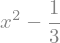

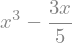

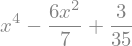

In [38]:
basis = {'a':1,'b':x,'c':x**2,'d':x**3,'e':x**4}

a1 = 1
b1 = x
c1 = x**2 - sm.Rational(1,3)
d1 = basis['d'] - integration(basis['d'],c1)/integration(c1,c1)*c1 - integration(basis['d'],b1)/integration(b1,b1)*b1 - integration(basis['d'],a1)/integration(a1,a1)*a1
e1 = basis['e'] - integration(basis['e'],d1)/integration(d1,d1)*d1 - integration(basis['e'],c1)/integration(c1,c1)*c1 - integration(basis['e'],b1)/integration(b1,b1)*b1 - integration(basis['e'],a1)/integration(a1,a1)*a1

display(a1)
display(b1)
display(c1)
display(d1)
display(e1)

### Vector Subspace

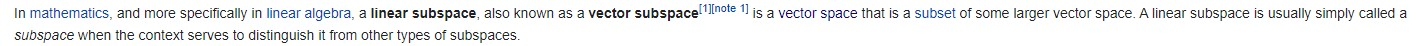

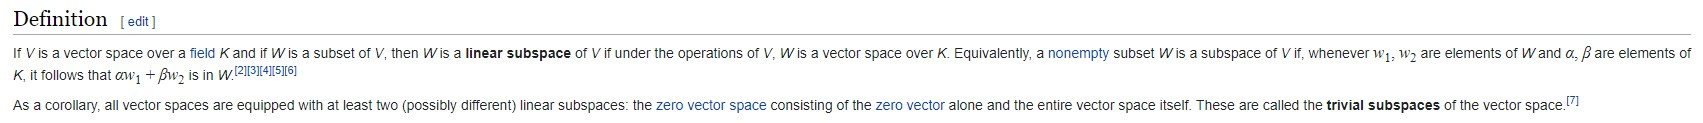

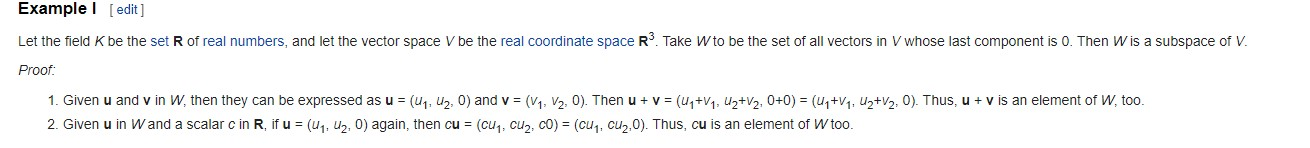

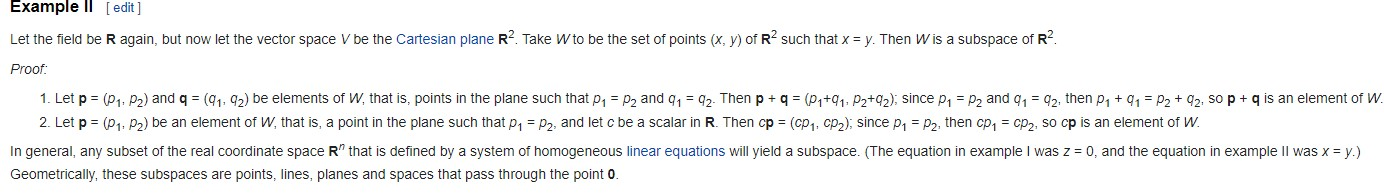

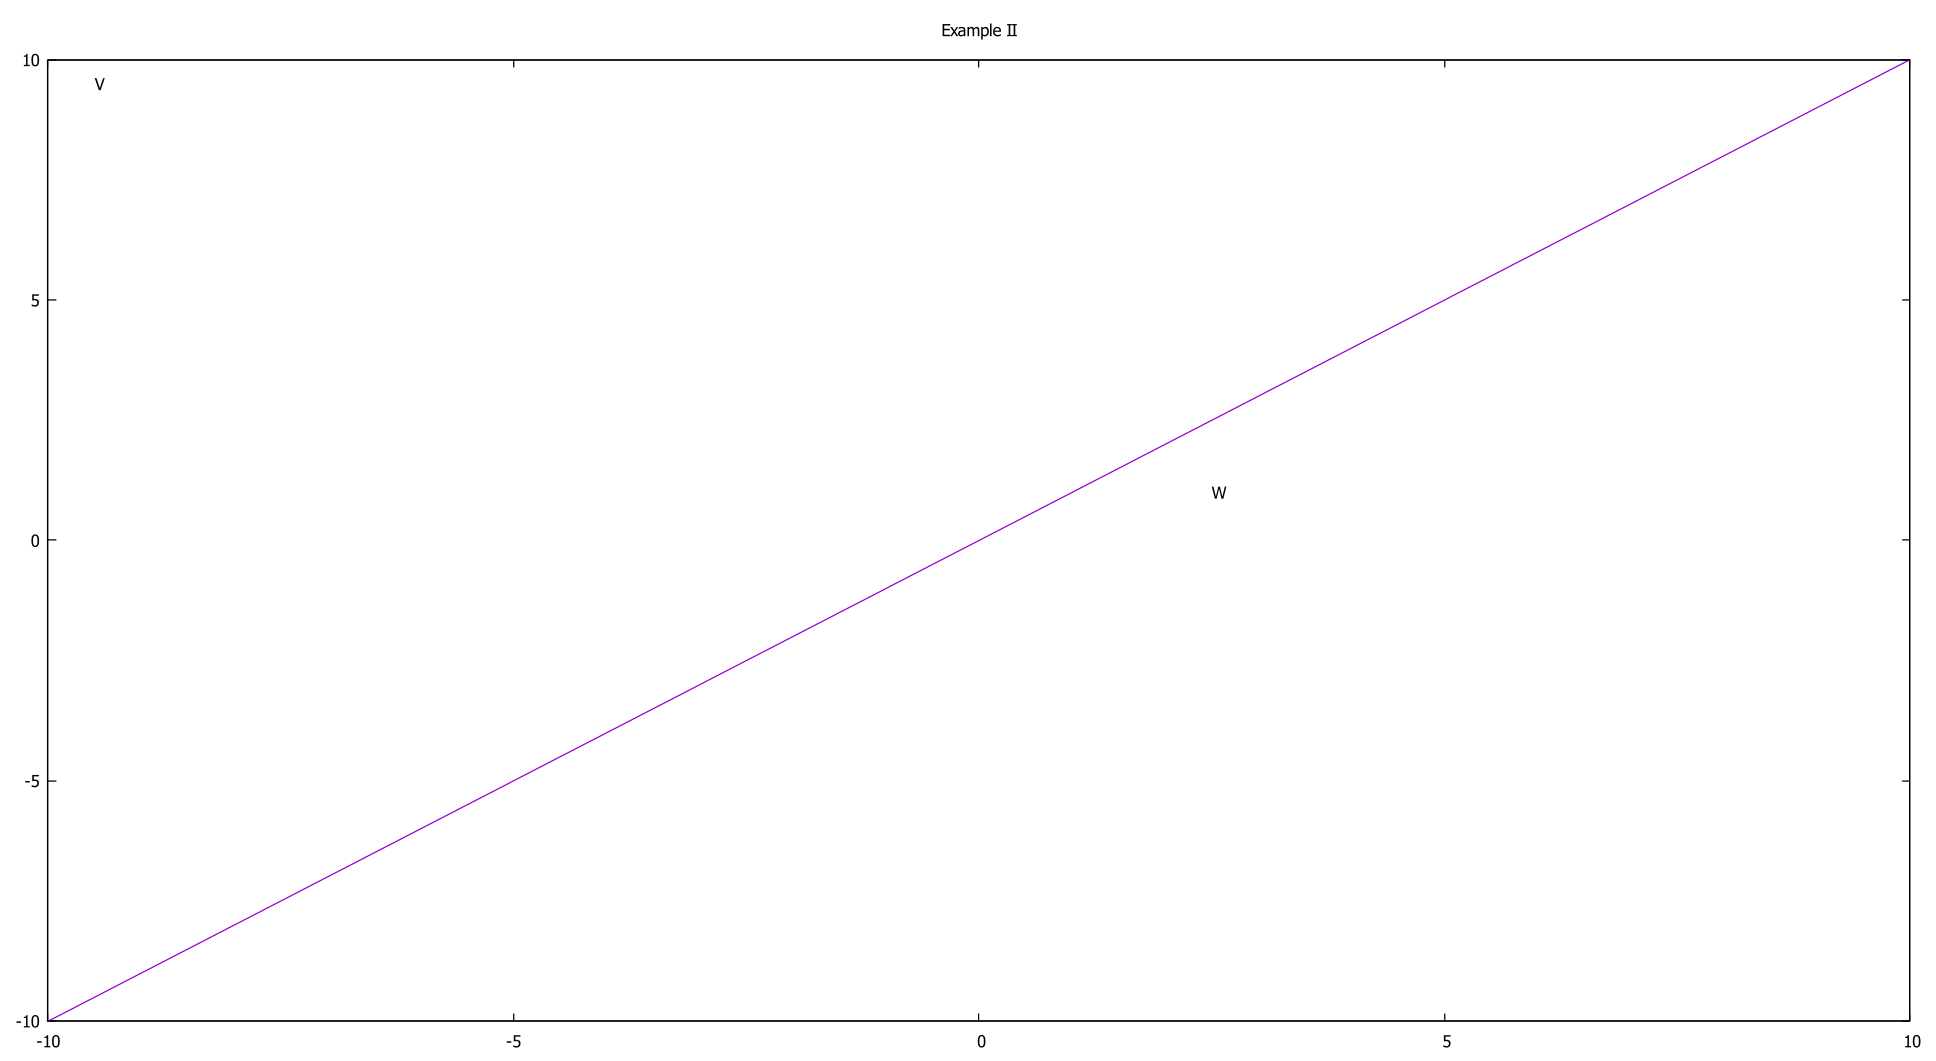

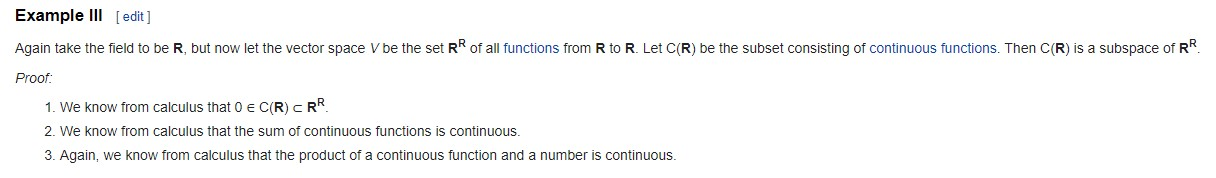

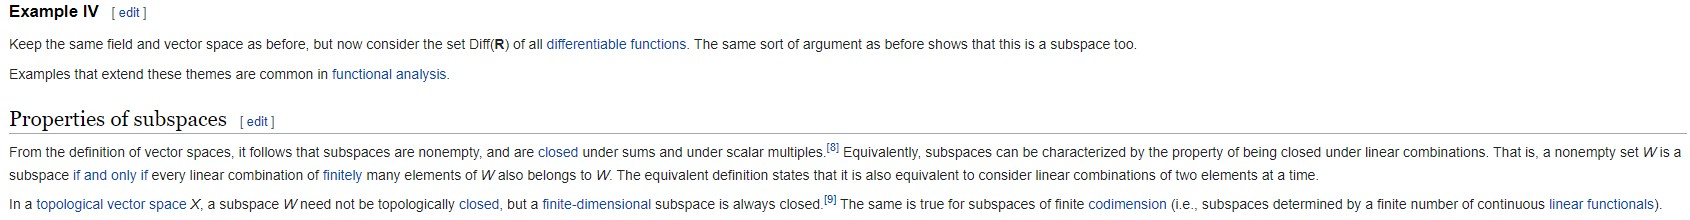

## Matrix Multiplication

In [386]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [387]:
## matrix multiplication

def mulmat(r1,c1,r2,c2):
    
    if c1 != r2:
        print('The column of 1st Matrix and row of 2nd matrix must agree')
        
    else:
        A = np.zeros(shape=(r1,c1))
        B = np.zeros(shape=(r2,c2))
    
        for i in range(0,r1):
            for j in range(0,c1):
                A[i][j]=float(input('A[%i][%i]='%(i+1,j+1)))
    
        for i in range(0,r2):
            for j in range(0,c2):
                B[i][j]=float(input('B[%i][%i]='%(i+1,j+1)))
                
        c = np.zeros(shape=(r1,c2))
        
        sum = 0;
        for i in range(0,c2):
            for j in range(0,r1):
                sum=0
                for k in range(0,c1):
                    sum = sum + A[j][k]*B[k][i]
                c[j][i] = sum
                
    print(c)

In [388]:
mulmat(2,3,3,2)

A[1][1]=1
A[1][2]=2
A[1][3]=3
A[2][1]=4
A[2][2]=5
A[2][3]=6
B[1][1]=7
B[1][2]=8
B[2][1]=9
B[2][2]=1
B[3][1]=2
B[3][2]=3
[[31. 19.]
 [85. 55.]]


## Naive-Gauss

In [389]:
import numpy as np
import scipy as sc
import sympy as sm
import matplotlib.pyplot as plt
from IPython.display import display,Math

In [390]:
def naive_gauss(A,B):
    
    A = np.array(A)
    B = np.array(B)
    augmat = np.concatenate((A,B.T),axis=1)*1.0# c = np.hstack((A,B))
    
    r,c = np.shape(augmat)
    
    np.set_printoptions(precision=4)
    
    # forward elimination
    for i in range(0,c-1):
        for j in range(i+1,r):
            multiplier = augmat[j][i]/augmat[i][i]
            for k in range(0,c):
                augmat[j][k] = augmat[j][k] - multiplier*augmat[i][k]
                
    A = augmat[:,0:c-1]
    B = augmat[:,c-1]
    
    x = np.zeros(shape=(r,1))
    # backward substitution
    for i in np.arange(r-1,-1,-1):
        sum = 0
        for j in range(0,r):
            if i != j:
                sum = sum + A[i][j]*x[j]
        x[i] = (B[i] - sum)/A[i][i]
        
    return x

In [391]:
A = [[3,-0.1,-0.2],
    [0.1,7,-0.3],
    [0.3,-0.2,10]]

B = [[7.85,-19.3,71.4]]

x = naive_gauss(A,B)
x

array([[ 3. ],
       [-2.5],
       [ 7. ]])

In [392]:
A = [[1,2,-1,1],
    [-1,1,2,-1],
    [2,-1,2,2],
    [1,1,-1,2]]

B = [[6,3,14,8]]

x = naive_gauss(A,B)
x

array([[1.],
       [2.],
       [3.],
       [4.]])

## Gausian Elimination

In [393]:
def swap(i,r,c,augmat):
    
    for j in range(i+1,c):
        if(abs(augmat[j][j])>0):
            augmat[[j,i]] = augmat[[i,j]]
            break
    
    return augmat

def upper_triMat(A,r,c):
    
    np.set_printoptions(precision=4)
    
    # forward elimination
    for i in range(0,c-2):
        if A[i][i] == 0:
            A = swap(i,r,c,A)
        
        for j in range(i+1,r):
            multiplier = A[j][i]/A[i][i]
            for k in range(0,c):
                A[j][k] = A[j][k] - multiplier*A[i][k]
                
        
    return A

def gaussian_elimination(A,B):
    
    
    A = np.array(A)
    B = np.array(B)
    augmat = np.concatenate((A,B.T),axis=1)*1.0# c = np.hstack((A,B))
    
    r,c = np.shape(augmat)
    
    np.set_printoptions(precision=4)
    
    augmat = upper_triMat(augmat.copy(),r,c)
                
                
    A = augmat[:,0:c-1]
    B = augmat[:,c-1]

    x = np.zeros(shape=(r,1))
    # backward substitution
    for i in np.arange(r-1,-1,-1):
        sum = 0
        for j in range(0,r):
            if i != j:
                sum = sum + A[i][j]*x[j]
        x[i] = (B[i] - sum)/A[i][i]
        
    return x

In [394]:
# 9.9

A = [[4,1,-1],
    [5,1,2],
    [6,1,1]]

B = [[-2,4,6]]

gaussian_elimination(A,B)

array([[  3.],
       [-13.],
       [  1.]])

In [395]:
# 9.10

A = [[2,-6,-1],
    [-3,-1,7],
    [-8,1,-2]]

B = [[-38,-34,-20]]

gaussian_elimination(A,B)

array([[ 4.],
       [ 8.],
       [-2.]])

In [396]:
# 9.11

A = [[0, -3, 7],
    [1, 2, -2],
    [5, -2, 0]]

B = [[2, 3, 2]]

gaussian_elimination(A,B)

array([[1.2222],
       [2.0556],
       [1.1667]])

In [397]:
A = [[1,2,-1,1],
    [-1,1,2,-1],
    [2,-1,2,2],
    [1,1,-1,2]]
B = [[6,3,14,8]]

print(B)
np.flip(B,1)

[[6, 3, 14, 8]]


array([[ 8, 14,  3,  6]])

## Gauss-Jordan

In [398]:
import numpy as np
import scipy as sc
import sympy as sm
import matplotlib.pyplot as plt
from IPython.display import display,Math

In [399]:
def swap(i,r,c,augmat):
    
    for j in range(i+1,c):
        if(abs(augmat[j][j])>0):
            augmat[[j,i]] = augmat[[i,j]]
            break
    
    return augmat


def gauss_jordan(A,B):
    
    
    A = np.array(A)
    B = np.array(B)
    augmat = np.concatenate((A,B.T),axis=1)*1.0# c = np.hstack((A,B))
    
    r,c = np.shape(augmat)
    
    np.set_printoptions(precision=4)
    
    # forward elimination
    for i in range(0,c-2):
        if augmat[i][i] == 0:
            augmat = swap(i,r,c,augmat)
        
        for j in range(i+1,r):
            multiplier = augmat[j][i]/augmat[i][i]
            for k in range(0,c):
                augmat[j][k] = augmat[j][k] - multiplier*augmat[i][k]
                
                
    A = augmat[:,0:c-1]
    B = augmat[:,c-1]
    A = np.flip(A,(0,1))
    B = [B.tolist()]
    B = np.array(B)
    B = np.flip(B,1)
    augmat = np.concatenate((A,B.T),axis=1)*1.0# c = np.hstack((A,B))
    for i in range(0,c-2):
        if augmat[i][i] == 0:
            augmat = swap(i,r,c,augmat)
        
        for j in range(i+1,r):
            multiplier = augmat[j][i]/augmat[i][i]
            for k in range(0,c):
                augmat[j][k] = augmat[j][k] - multiplier*augmat[i][k]
    
    print(augmat)
    A = augmat[:,0:c-1]
    B = augmat[:,c-1]
    
    A = augmat[:,0:c-1]
    B = augmat[:,c-1]
    A = np.flip(A,(0,1))


    B = B.tolist()
    B.reverse()

    x = np.zeros(shape=(r,1))
    
    # x values
    for i in np.arange(0,r,1):
        x[i] = B[i]/A[i][i]
        
    return x

In [400]:
# 9.12

A = [[2,1,-1],
    [5,2,2],
    [3,1,1]]

B = [[1,-4,5]]

gauss_jordan(A,B)

[[-2.   0.   0.  10. ]
 [ 0.  -0.5  0.  16. ]
 [ 0.   0.   2.  28. ]]


array([[ 14.],
       [-32.],
       [ -5.]])

In [401]:
# 9.13(c)

A = [[1,1,-1],
    [6,2,2],
    [3,1,1]]

B = [[-3,2,1]]

gauss_jordan(A,B) #has problem last row zero

[[ 8.  -4.   0.  20. ]
 [ 0.   0.5  1.  -0.5]
 [ 0.   0.   0.   0. ]]


C:\Users\alvi93\AppData\Local\Temp/ipykernel_2080/1002567885.py:65: RuntimeWarning: invalid value encountered in double_scalars
  x[i] = B[i]/A[i][i]


array([[ nan],
       [-1. ],
       [ 2.5]])

In [402]:
A = [[3,-0.1,-0.2],
    [0.1,7,-0.3],
    [0.3,-0.2,10]]

B = [[7.85,-19.3,71.4]]

x = gauss_jordan(A,B)
x

[[ 10.012    0.       0.      70.0843]
 [  0.       7.0033   0.     -17.5083]
 [  0.       0.       3.       9.    ]]


array([[ 3. ],
       [-2.5],
       [ 7. ]])

## LU Decomposition

### Dolittle Method

In [403]:
import cmath as cm
import numpy as np
import scipy as sc
import sympy as sm
import matplotlib.pyplot as plt
from IPython.display import display,Math

In [404]:
def swap(i,r,c,mat):
    
    for j in range(i+1,c):
        if(abs(mat[j][j])>0):
            mat[[j,i]] = mat[[i,j]]
            break
    
    return mat


def upper_triMat(matA,r,c):
    
    np.set_printoptions(precision=4)
    
    # forward elimination
    for i in range(0,c-1):
        if matA[i][i] == 0:
            matA = swap(i,r,c,matA)
        
        for j in range(i+1,r):
            multiplier = matA[j][i]/matA[i][i]
            for k in range(0,c):
                matA[j][k] = matA[j][k] - multiplier*matA[i][k]
                    
    return matA


def dolittle(A):
    
    A = np.array(A)
    r,c = np.shape(A)
    
    U = upper_triMat(A.copy(),r,c)
    l = np.eye(r,c)
    for i in range(0,r-1):
        for j in range(i+1,r):
            sum = 0
            for k in range(0,r):
                if i != k:
                    sum = sum + U[k][i]*l[j][k]
            l[j][i] = (A[j][i]-sum)/U[i][i]
            
    return l,U

In [405]:
A = [[2.04,-1,0,0],
    [-1,2.04,-1,0],
    [0,-1,2.04,-1],
    [0,0,-1,2.04]]

dolittle(A)

(array([[ 1.    ,  0.    ,  0.    ,  0.    ],
        [-0.4902,  1.    ,  0.    ,  0.    ],
        [ 0.    , -0.6452,  1.    ,  0.    ],
        [ 0.    ,  0.    , -0.717 ,  1.    ]]),
 array([[ 2.04  , -1.    ,  0.    ,  0.    ],
        [ 0.    ,  1.5498, -1.    ,  0.    ],
        [ 0.    ,  0.    ,  1.3948, -1.    ],
        [ 0.    ,  0.    ,  0.    ,  1.323 ]]))

In [406]:
A = [[3,-0.1,-0.2],
    [0.1,7,-0.3],
    [0.3,-0.2,10]]

dolittle(A)

(array([[ 1.    ,  0.    ,  0.    ],
        [ 0.0333,  1.    ,  0.    ],
        [ 0.1   , -0.0271,  1.    ]]),
 array([[ 3.    , -0.1   , -0.2   ],
        [ 0.    ,  7.0033, -0.2933],
        [ 0.    ,  0.    , 10.012 ]]))

In [407]:
A = [[7,2,-3],
    [2,5,-3],
    [1,-1,-6]]

dolittle(A)

(array([[ 1.    ,  0.    ,  0.    ],
        [ 0.2857,  1.    ,  0.    ],
        [ 0.1429, -0.3214,  1.    ]]),
 array([[ 7,  2, -3],
        [ 0,  4, -2],
        [ 0,  0, -5]]))

### Crout's Method

In [408]:
import cmath as cm
import numpy as np
import scipy as sc
import sympy as sm
import matplotlib.pyplot as plt
from IPython.display import display,Math

In [409]:
def crout(A):
    
    r,c = np.shape(A)
    l = np.zeros(shape=(r,c))
    U = np.eye(r,c)

    np.set_printoptions(precision=4)
    for i in range(0,c):
        l[i][0] = A[i][0]
    for j in range(1,r):
        U[0][j] = A[0][j]/l[0][0]
        
    for i in range(1,r):
        
        for j in range(1,i+1):
            sum = 0
            for k in range(0,j):
                sum = sum + l[i][k]*U[k][j]
            l[i][j] = A[i][j] - sum
            
        for j in range(i+1,r):    
            sum = 0
            for k in range(0,i):
                sum = sum + l[i][k]*U[k][j]
            U[i][j] = (A[i][j]-sum)/l[i][i]
        
    return l,U

In [410]:
A = [[3,-0.1,-0.2],
    [0.1,7,-0.3],
    [0.3,-0.2,10]]

crout(A)

(array([[ 3.    ,  0.    ,  0.    ],
        [ 0.1   ,  7.0033,  0.    ],
        [ 0.3   , -0.19  , 10.012 ]]),
 array([[ 1.    , -0.0333, -0.0667],
        [ 0.    ,  1.    , -0.0419],
        [ 0.    ,  0.    ,  1.    ]]))

## Inverse Matrix

$[A]_{n\times n}[a]_{n\times n}=I_{n\times n}$, where A is the given matrix, a is the inverse of A and I is the identity matrix

$[A]_{n\times n}$$\begin{bmatrix}
a_{11}\\
a_{21}\\
a_{31}\\
.\\
.\\
.\\
.\\
a_{n1}\\
\end{bmatrix}_{n\times 1}$+$[A]_{n\times n}$$\begin{bmatrix}
a_{12}\\
a_{22}\\
a_{32}\\
.\\
.\\
.\\
.\\
a_{n2}\\
\end{bmatrix}_{n\times 1}$ + $[A]_{n\times n}$$\begin{bmatrix}
a_{13}\\
a_{23}\\
a_{33}\\
.\\
.\\
.\\
.\\
a_{n3}\\
\end{bmatrix}_{n\times 1}$+...............+$[A]_{n\times n}$$\begin{bmatrix}
a_{1n}\\
a_{2n}\\
a_{3n}\\
.\\
.\\
.\\
.\\
a_{nn}\\
\end{bmatrix}_{n\times 1}$ = $\begin{bmatrix}
1\\
0\\
0\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$ + $\begin{bmatrix}
0\\
1\\
0\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$ + $\begin{bmatrix}
0\\
0\\
1\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$ + .............. + $\begin{bmatrix}
0\\
0\\
0\\
.\\
.\\
.\\
.\\
1\\
\end{bmatrix}_{n\times 1}$

breaking this matrix gives 

$[A]_{n\times n}$$\begin{bmatrix}
a_{11}\\
a_{21}\\
a_{31}\\
.\\
.\\
.\\
.\\
a_{n1}\\
\end{bmatrix}_{n\times 1}$=$\begin{bmatrix}
1\\
0\\
0\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$            $[A]_{n\times n}$$\begin{bmatrix}
a_{12}\\
a_{22}\\
a_{32}\\
.\\
.\\
.\\
.\\
a_{n2}\\
\end{bmatrix}_{n\times 1}$=$\begin{bmatrix}
0\\
1\\
0\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$           $[A]_{n\times n}$$\begin{bmatrix}
a_{13}\\
a_{23}\\
a_{33}\\
.\\
.\\
.\\
.\\
a_{n3}\\
\end{bmatrix}_{n\times 1}$=$\begin{bmatrix}
0\\
0\\
1\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$....................$[A]_{n\times n}$$\begin{bmatrix}
a_{1n}\\
a_{2n}\\
a_{3n}\\
.\\
.\\
.\\
.\\
a_{nn}\\
\end{bmatrix}_{n\times 1}$=$\begin{bmatrix}
0\\
0\\
0\\
.\\
.\\
.\\
.\\
1\\
\end{bmatrix}_{n\times 1}$

getting upper triangular matrices from these

$[U]_{n\times n}$$\begin{bmatrix}
a_{11}\\
a_{21}\\
a_{31}\\
.\\
.\\
.\\
.\\
a_{n1}\\
\end{bmatrix}_{n\times 1}$ = $\begin{bmatrix}
d_{11}\\
d_{21}\\
d_{31}\\
.\\
.\\
.\\
.\\
d_{n1}\\
\end{bmatrix}_{n\times 1}$            $[U]_{n\times n}$$\begin{bmatrix}
a_{12}\\
a_{22}\\
a_{32}\\
.\\
.\\
.\\
.\\
a_{n2}\\
\end{bmatrix}_{n\times 1}$ = $\begin{bmatrix}
d_{12}\\
d_{22}\\
d_{32}\\
.\\
.\\
.\\
.\\
d_{n2}\\
\end{bmatrix}_{n\times 1}$           $[U]_{n\times n}$$\begin{bmatrix}
a_{13}\\
a_{23}\\
a_{33}\\
.\\
.\\
.\\
.\\
a_{n3}\\
\end{bmatrix}_{n\times 1}$ = $\begin{bmatrix}
d_{13}\\
d_{23}\\
d_{33}\\
.\\
.\\
.\\
.\\
d_{n3}\\
\end{bmatrix}_{n\times 1}$...............$[U]_{n\times n}$$\begin{bmatrix}
a_{1n}\\
a_{2n}\\
a_{3n}\\
.\\
.\\
.\\
.\\
a_{nn}\\
\end{bmatrix}_{n\times 1}$ = $\begin{bmatrix}
d_{1n}\\
d_{2n}\\
d_{3n}\\
.\\
.\\
.\\
.\\
d_{nn}\\
\end{bmatrix}_{n\times 1}$ 

multiplying both sides by $[L]$ 

$[L]_{n\times n}[U]_{n\times n}$$\begin{bmatrix}
a_{11}\\
a_{21}\\
a_{31}\\
.\\
.\\
.\\
.\\
a_{n1}\\
\end{bmatrix}_{n\times 1}$ = $[L]$$\begin{bmatrix}
d_{11}\\
d_{21}\\
d_{31}\\
.\\
.\\
.\\
.\\
d_{n1}\\
\end{bmatrix}_{n\times 1}$   $[L]_{n\times n}[U]_{n\times n}$$\begin{bmatrix}
a_{12}\\
a_{22}\\
a_{32}\\
.\\
.\\
.\\
.\\
a_{n2}\\
\end{bmatrix}_{n\times 1}$ = $[L]$$\begin{bmatrix}
d_{12}\\
d_{22}\\
d_{32}\\
.\\
.\\
.\\
.\\
d_{n2}\\
\end{bmatrix}_{n\times 1}$   $[L]_{n\times n}[U]_{n\times n}$$\begin{bmatrix}
a_{13}\\
a_{23}\\
a_{33}\\
.\\
.\\
.\\
.\\
a_{n3}\\
\end{bmatrix}_{n\times 1}$ = $[L]$$\begin{bmatrix}
d_{13}\\
d_{23}\\
d_{33}\\
.\\
.\\
.\\
.\\
d_{n3}\\
\end{bmatrix}_{n\times 1}$....\\

$[L]_{n\times n}[U]_{n\times n}$$\begin{bmatrix}
a_{1n}\\
a_{2n}\\
a_{3n}\\
.\\
.\\
.\\
.\\
a_{nn}\\
\end{bmatrix}_{n\times 1}$ = $[L]$$\begin{bmatrix}
d_{1n}\\
d_{2n}\\
d_{3n}\\
.\\
.\\
.\\
.\\
d_{nn}\\
\end{bmatrix}_{n\times 1}$

So,

$[L]_{n\times n}[U]_{n\times n}=[A]_{n\times n}$   

and   

$[L][d_{k1}]$=$\begin{bmatrix}
1\\
0\\
0\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$ k = 1,2,3.....,n  $\hspace{10 pt}$  $[L][d_{k2}]$=$\begin{bmatrix}
0\\
1\\
0\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$ k = 1,2,3.....,n  $\hspace{10 pt}$ $[L][d_{k2}]$=$\begin{bmatrix}
0\\
0\\
1\\
.\\
.\\
.\\
.\\
0\\
\end{bmatrix}_{n\times 1}$ k = 1,2,3.....,n  $\hspace{10 pt}$ $[L][d_{kn}]$=$\begin{bmatrix}
0\\
0\\
0\\
.\\
.\\
.\\
.\\
1\\
\end{bmatrix}_{n\times 1}$ k = 1,2,3.....,n

In [411]:
import cmath as cm
import numpy as np
import scipy as sc
import sympy as sm
import matplotlib.pyplot as plt
from IPython.display import display,Math

In [412]:
def swap(i,r,c,mat):
    
    for j in range(i+1,c):
        if(abs(mat[j][j])>0):
            mat[[j,i]] = mat[[i,j]]
            break
    
    return mat


def upper_triMat(matA,r,c):
    
    # forward elimination
    for i in range(0,c-1):
        if matA[i][i] == 0:
            matA = swap(i,r,c,matA)
        
        for j in range(i+1,r):
            multiplier = matA[j][i]/matA[i][i]
            for k in range(0,c):
                matA[j][k] = matA[j][k] - multiplier*matA[i][k]
                    
    return matA


def dolittle(A,r,c):
    
    A = np.array(A)
    r,c = np.shape(A)

    U = upper_triMat(A.copy(),r,c)
    l = np.eye(r,c)
    for i in range(0,r-1):
        for j in range(i+1,r):
            sum = 0
            for k in range(0,r):
                if i != k:
                    sum = sum + U[k][i]*l[j][k]
            l[j][i] = (A[j][i]-sum)/U[i][i]
            
    return l,U

def forward_sub(matA,matB,r,c):

    f = np.zeros(shape=(r,1))
    for i in np.arange(0,r,1):
        sum = 0
        for j in range(0,r):
            if i != j:
                sum = sum + matA[i][j]*f[j]
        f[i] = (matB[i] - sum)/matA[i][i]
    
    return f

def backward_sub(matA,matB,r,c):

    b = np.zeros(shape=(r,1))
    for i in np.arange(r-1,-1,-1):
        sum = 0
        for j in range(0,r):
            if i != j:
                sum = sum + matA[i][j]*b[j]
        b[i] = (matB[i] - sum)/matA[i][i]
    
    return b

def gaussian_elimination(A,B):
    
    A = np.array(A)
    B = np.array(B)
    augmat = np.concatenate((A,B.T),axis=1)*1.0# c = np.hstack((A,B))
    r,c = np.shape(augmat)
    
    augmat = upper_triMat(augmat.copy(),r,c) # upper triangular form of aumented matrix upto c-1 column
                           
    A = augmat[:,0:c-1]
    B = augmat[:,c-1]


    # forward substitution
    x = forward_sub(A.copy(),B.copy(),r,c)
        
    return x

def invMat(A):
    
    r,c = np.shape(A)
    l,U = dolittle(A.copy(),r,c)
    inverse = np.zeros(shape=(r,c))
    
    np.set_printoptions(precision=7)
    I = np.eye(r,c)
    for i in range(0,r,1):
        B = I[:,i]
        B = [B.tolist()]
        B = np.array(B)
 
        d = gaussian_elimination(l.copy(),B.copy())
        inverse[:,i] = backward_sub(U.copy(),d.copy(),r,c).ravel() # return (3,1) turned into (3) by ravel

    print(inverse)

In [413]:
A = [[3,-0.1,-0.2],
    [0.1,7,-0.3],
    [0.3,-0.2,10]]

invMat(A)

[[ 0.3324887  0.0049441  0.0067981]
 [-0.0051818  0.1429026  0.0041834]
 [-0.0100783  0.0027097  0.0998797]]


## Thomas method tridiagonal Matrix

$\begin{bmatrix}
f_{1} & g_{1} &       & \\
e_{2} & f_{2} & g_{2} & \\
      & e_{3} & f_{3} & g_{3}\\
      &       & e_{4} & f_{4}\\
\end{bmatrix}$ = $[L][U]$

$\begin{bmatrix}
f_{1}                          & g_{1}                          &              &       \\
e_{2}-f_{1}\frac{e_{2}}{f_{1}} & f_{2}-g_{1}\frac{e_{2}}{f_{1}} & g_{2}        &       \\
                               &              e_{3}             & f_{3}        & g_{3} \\
                               &                                & e_{4}        & f_{4} \\
\end{bmatrix}$

$\begin{bmatrix}
f_{1}                          & g_{1}                                                                            &              &       \\
e_{2}-f_{1}\frac{e_{2}}{f_{1}} & f_{2}-g_{1}\frac{e_{2}}{f_{1}}                                                   & g_{2}        &       \\
                               & e_{3}-\frac{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3} &  f_{3}-\frac{g_{2}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3}&   g_{3}\\
                               &                                                                                  &  e_{4}
                               & f_{4}\\
\end{bmatrix}$

$\Large{\begin{bmatrix}
f_{1}                          & g_{1}                                                                            &              &       \\
e_{2}-f_{1}\frac{e_{2}}{f_{1}} & f_{2}-g_{1}\frac{e_{2}}{f_{1}}                                                   & g_{2}        &       \\
                               & e_{3}-\frac{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3} &  f_{3}-\frac{g_{2}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3}&   g_{3}\\
                               &                                                                                  & e_{4}-\frac{f_{3}-\frac{g_{2}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3}}{f_{3}-\frac{g_{2}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3}}e_{4}            & f_{4} - \frac{g_{3}}{f_{3}-\frac{g_{2}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3}}e_{4}
\end{bmatrix}}$ = $\Large{[U]}$

Let's assume,

$[L]$ = $\Large{\begin{bmatrix}
1       &         &        &  \\
l_{21}  & 1       &        &  \\
        & l_{31}  & 1      &  \\
        &         & l_{41} & 1 \\
\end{bmatrix}}$

$\Large{\begin{bmatrix}
1       &         &        &  \\
l_{21}  & 1       &        &  \\
        & l_{32}  & 1      &  \\
        &         & l_{43} & 1 \\
\end{bmatrix}}$$\Large{\begin{bmatrix}
f_{1}                          & g_{1}                                                                            &              &       \\
                               & f_{2}-g_{1}\frac{e_{2}}{f_{1}}                                                   & g_{2}        &       \\
                               &                                                                                  &  f_{3}-\frac{g_{2}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3}&   g_{3}\\
                               &                                                                                  &             & f_{4} - \frac{g_{3}}{f_{3}-\frac{g_{2}}{f_{2}-g_{1}\frac{e_{2}}{f_{1}}}e_{3}}
\end{bmatrix}}$

$\begin{bmatrix}
f_{1}       & g_{1}                                       &                           &\\
l_{21}f_{1} & g_{1}l_{21}+f_{2}-g_{1}\frac{e_{2}}{f_{1}}  & g_{2}                     &\\
            & l_{32}(f_{2}-g_{1}\frac{e_{2}}{f_{1}})      & g_{2}l_{32} + f_{3}-\frac{g_{2}}{f_{2}-\frac{e_{2}}{f_{1}}g_{1}}e_{3} &  g_{3}\\
            &                                             &  l_{43}(f_{3}-\frac{e_{3}}{f_{2}-\frac{e_{2}}{f_{1}}g_{1}}g_{2})   & g_{3}l_{43} + f_{4}-\frac{e_{4}}{f_{3}-\frac{e_{3}}{f_{2}-\frac{e_{2}}{f_{1}}g_{1}}g_{2}}g_{3}
\end{bmatrix}$

In [414]:
def decomposition(A,n):
    
    for i in range(1,n):
        A[i][i-1] = A[i-1][i]/A[i-1][i-1]
        A[i][i] = A[i][i] - A[i][i-1]*A[i-1][i]
    
    l = np.eye(n,n)
    U = np.zeros(shape=(n,n))
     
    for i in range(1,n):
        l[i][i-1] = A[i][i-1]
        U[i][i] = A[i][i]
    
    for i in range(0,n-1):
        U[i][i+1] = A[i][i+1]
    
    U[0][0] = A[0][0]
    return A,l,U

def forward_sub(A,B,n):
    
    for i in range(1,n):       
        B[i] = B[i] - B[i-1]*A[i][i-1]        
    
    return B

def backward_sub(A,B,n):
    
    x = np.zeros(n)*1.0
    x[n-1] = B[n-1]/A[n-1][n-1]
    for i in range(n-2,-1,-1):
        x[i] = (B[i] - A[i][i+1]*x[i+1])/A[i][i]
        # print('B[%g]=%f A[%g][%g]=%f A[%g][%g]=%f x[%g]=%f'%(i,B[i],i,i-1,A[i][i-1],i,i,A[i][i],i,x[i]))        
    
    return x
    
def thomas(matA,matB):
    
    np.set_printoptions(precision=4)
    matA = np.array(matA)
    matB = np.array(matB)
    
    r,c = np.shape(matA)
    matA,l,U = decomposition(matA.copy(),c)
    matB = forward_sub(matA.copy(),matB.copy(),r)

    x = backward_sub(U.copy(),matB.copy(),r)
    
    return x

In [415]:
A = [[2.04, -1, 0, 0],
    [-1, 2.04, -1, 0],
    [0, -1, 2.04, -1],
    [0, 0, -1, 2.04]]

B = [40.8, 0.8, 0.8, 200.8]

thomas(A, B)

array([ 65.9698,  93.7785, 124.5382, 159.4795])

#### Using sparse system using scipy

In [416]:
import numpy as np
import scipy.sparse as scsp
import scipy.sparse.linalg

matA = scsp.diags([-1, 2.04, -1],[-1, 0, 1],shape=(4,4))
matB = np.array([40.8, 0.8, 0.8, 200.8])
x = scipy.sparse.linalg.spsolve(matA.tocsr(), matB).reshape(-1,1)
x

array([[ 65.9698],
       [ 93.7785],
       [124.5382],
       [159.4795]])

## Cholesky Decomposition

$A$ has to be positive definite

-All determinents formed from the upper left corner is greater than zero.

-If and only if the eigen values are positive

-$\{x\}^{T}A\{x\}>0$, for all $x \in \mathbb{R}$, $x\neq 0$

$[L] = \begin{bmatrix}
l_{0,0}   &    0       &    0      & ......... &   0         &   0\\
l_{1,0}   &  l_{1,1}   &    0      & ......... &   0         &   0\\
l_{2,0}   &  l_{2,1}   & l_{2,2}   & ......... &   0         &   0\\
\cdot     &  \cdot     & \cdot     & ..........&   0         &   0 \\
\cdot     &  \cdot     & \cdot     & ..........&   0         &   0 \\
\cdot     &  \cdot     & \cdot     & ..........&   0         &   0 \\
l_{n-1,0} &  l_{n-1,1} & l_{n-1,2} & ..........& l_{n-1,n-1} &   0\\
l_{n,0}   &  l_{n,1}   & l_{n,2}   & ..........& l_{n,n-1}   & l_{n,n}\\
\end{bmatrix}$

$[L]^{T} = \begin{bmatrix}
l_{0,0} & l_{1,0} & l_{2,0} & .................. & l_{n-1,0}   & l_{n,0}\\
0       & l_{1,1} & l_{2,1} & .................. & l_{n-1,1}   & l_{n,1}\\
0       &    0    & l_{2,2} & .................. & l_{n-1,2}   & l_{n,2}\\
\cdot   &   \cdot &  \cdot  & .................. &   \cdot     & \cdot \\  
\cdot   &   \cdot &  \cdot  & .................. &   \cdot     & \cdot \\
\cdot   &   \cdot &  \cdot  & .................. &   \cdot     & \cdot \\
  0     &     0   &    0    & .................. & l_{n-1,n-1} & l_{n,n-1} \\
  0     &     0   &    0    & .................. &      0      & l_{n,n}    
\end{bmatrix}$

$[A] = \begin{bmatrix} 
l_{0,0}l_{0,0} & l_{0,0}l_{1,0}               & l_{0,0}l_{2,0}               & ............. & l_{0,0}l_{n-1,0} & l_{0,0}l_{n,0}\\
l_{1,0}l_{0,0} & \sum_{k=0}^{1}l_{1,k}l_{1,k} & \sum_{k=0}^{1}l_{1,k}l_{2,k} & ............. & \sum_{k=0}^{1}l_{1,k}l_{(n-1),k}   &  \sum_{k=0}^{1}l_{1,k}l_{n,k}  \\
l_{2,0}l_{0,0} & \sum_{k=0}^{1}l_{2,k}l_{1,k} & \sum_{k=0}^{2}l_{2,k}l_{2,k} & ............. & \sum_{k=0}^{2}l_{2,k}l_{n-1,k}    & \sum_{k=0}^{2}l_{2,k}l_{n,k}\\
\cdot   &  \cdot & \cdot & ............. & \cdot & \cdot \\
\cdot   &  \cdot & \cdot & ............. & \cdot & \cdot \\
\cdot   &  \cdot & \cdot & ............. & \cdot & \cdot \\
l_{n-1,0}l_{0,0} & \sum_{k=0}^{1}l_{n-1,k}l_{1,k} & \sum_{k=0}^{2}l_{n-1,k}l_{2,k} & ............. & \sum_{k=0}^{n-1}l_{n-1,k}l_{n-1,k} & \sum_{k=0}^{n-1}l_{n-1,k}l_{n,k}\\
l_{n,0}l_{0,0}   & \sum_{k=0}^{1}l_{n,k}l_{1,k} & \sum_{k=0}^{2}l_{n,k}l_{2,k}    & ............. & \sum_{k=0}^{n-1}l_{n,k}l_{n-1,k} & \sum_{k=0}^{n}l_{n,k}l_{n,k}
\end{bmatrix}$

The `Cholesky–Banachiewicz` algorithm starts from the upper left corner of the matrixL and proceeds to calculate
the matrix row by row

The `Cholesky–Crout` algorithmstarts from the upper left corner of the matrixL and proceeds to calculate the
matrix column by column

In [417]:
def chelosky(A):
    
    A = np.array(A)
    r,c = np.shape(A)
    l = np.zeros(shape=(r,c))
    
    for i in range(0,r):
        for j in range(0,i+1):
            tsum = 0
            if i == j:
                for k in range(0,i):
                    tsum = tsum + l[i][k]**2
                l[i][i] = np.sqrt(A[i][i]-tsum)
            else:
                for k in range(0,j):
                    tsum = tsum + l[i][k]*l[j][k]
                l[i][j] = (A[i][j]-tsum)/l[j][j]
                
    return l

In [418]:
A = [[6, 15, 55],
    [15, 55, 225],
    [55, 225, 979]]

chelosky(A)

array([[ 2.4495,  0.    ,  0.    ],
       [ 6.1237,  4.1833,  0.    ],
       [22.4537, 20.9165,  6.1101]])

In [419]:
H = [[5.2, 3, .5, 1, 2],
    [3, 6.3, -2, 4, 0],
    [.5, -2, 8, -3.1, 3],
    [1, 4, -3.1, 7.6, 2.6],
    [2, 0, 3, 2.6, 15]]

chelosky(H)

array([[ 2.2804,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 1.3156,  2.1376,  0.    ,  0.    ,  0.    ],
       [ 0.2193, -1.0706,  2.6088,  0.    ,  0.    ],
       [ 0.4385,  1.6014, -0.568 ,  2.1262,  0.    ],
       [ 0.8771, -0.5398,  0.8547,  1.6768,  3.2244]])

## Gauss-Siedel Method

In [420]:
def function(A,B,xold,n):
    
    for i in range(0,n):
        tsum = 0
        for j in range(0,n):
            if i != j:
                tsum = tsum + A[i][j]*xold[j]
        xold[i] = (B[i]-tsum)/A[i][i]
        
    return xold

def gauss_siedel(A, B, tol):
    
    A = np.array(A)
    B = np.array(B)

    r,c = np.shape(A)
    x = np.zeros(r) # to get the history of x
    xo = np.zeros(r) # initial values
    
    d = np.zeros(r)
    error = np.ones(r) # error record
    e = 1
    
    i = 0; # no of iteration
    while e > tol:
        
        i = i + 1
        xn = function(A.copy(),B.copy(),xo,r)
        x = np.vstack((x,xn)) # stacking up the iterative values
        x0 = xn # saving new value to old for next iteration
        
        d = abs(np.subtract(x[i],x[i-1]))
        e = np.amax(d)
        error = np.vstack((error,d))
        
    return x0, x, i

In [421]:
A = [[3,-0.1,-0.2],
    [0.1,7,-0.3],
    [0.3,-0.2,10]]

B = [7.85,-19.3,71.4]
x, _, _ = gauss_siedel(A,B,.001)
x

array([ 3. , -2.5,  7. ])

## Laplace Equation

In [422]:
import numpy as np

In [423]:
def function(T,n):
    
    for i in range(1,n-1):
        for j in range(1,n-1):
            T[i][j] = 0.25*(T[i-1][j]+T[i+1][j]+T[i][j+1]+T[i][j-1])
            
    return T 

In [424]:
T = np.zeros(shape=(15,4,4))
T[1]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [425]:
T = np.zeros(shape=(4,4))
T[:,0] = 200
T[-1,:]=75
T[0,:] = 25
T[:,-1]= 0

i = 10
while i > 0:
    
    r,c = np.shape(T)
    T = function(T.copy(),r)
    i = i - 1
    
T

array([[ 25.    ,  25.    ,  25.    ,   0.    ],
       [200.    ,  93.7498,  43.7499,   0.    ],
       [200.    , 106.2499,  56.25  ,   0.    ],
       [ 75.    ,  75.    ,  75.    ,   0.    ]])

## 3d surface plot

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.outer(np.linspace(-2, 2, 10), np.ones(10))
y = x.copy().T
z = x*y

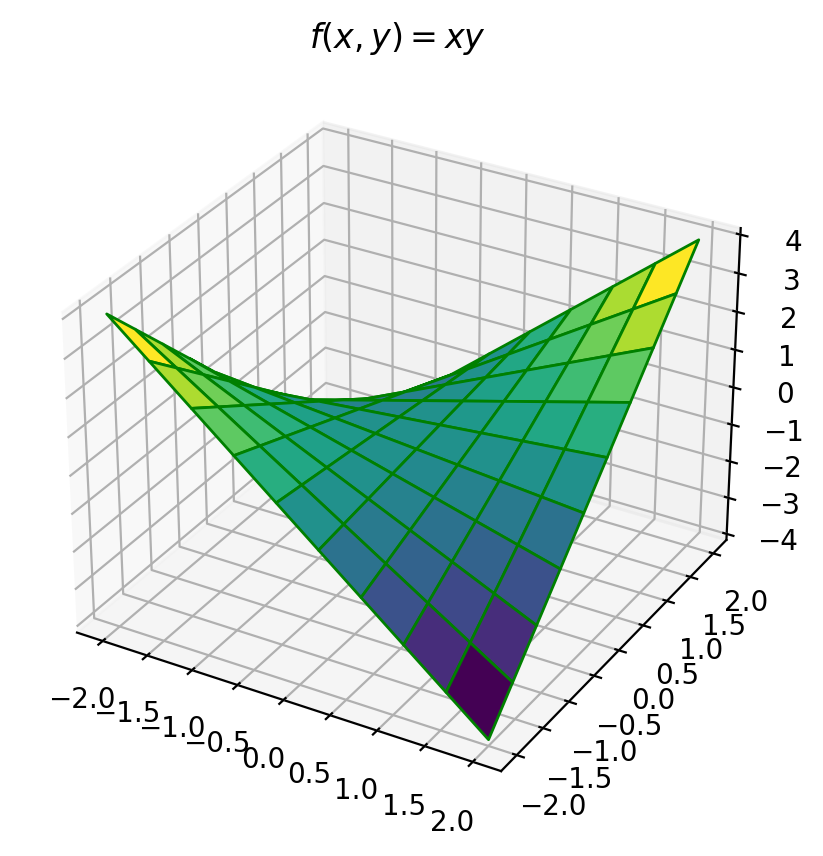

In [3]:
fig = plt.figure(figsize=(6,5), dpi=200)
ax = plt.axes(projection ='3d')
ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green')
ax.set_title('$f(x,y)=xy$')
plt.show()

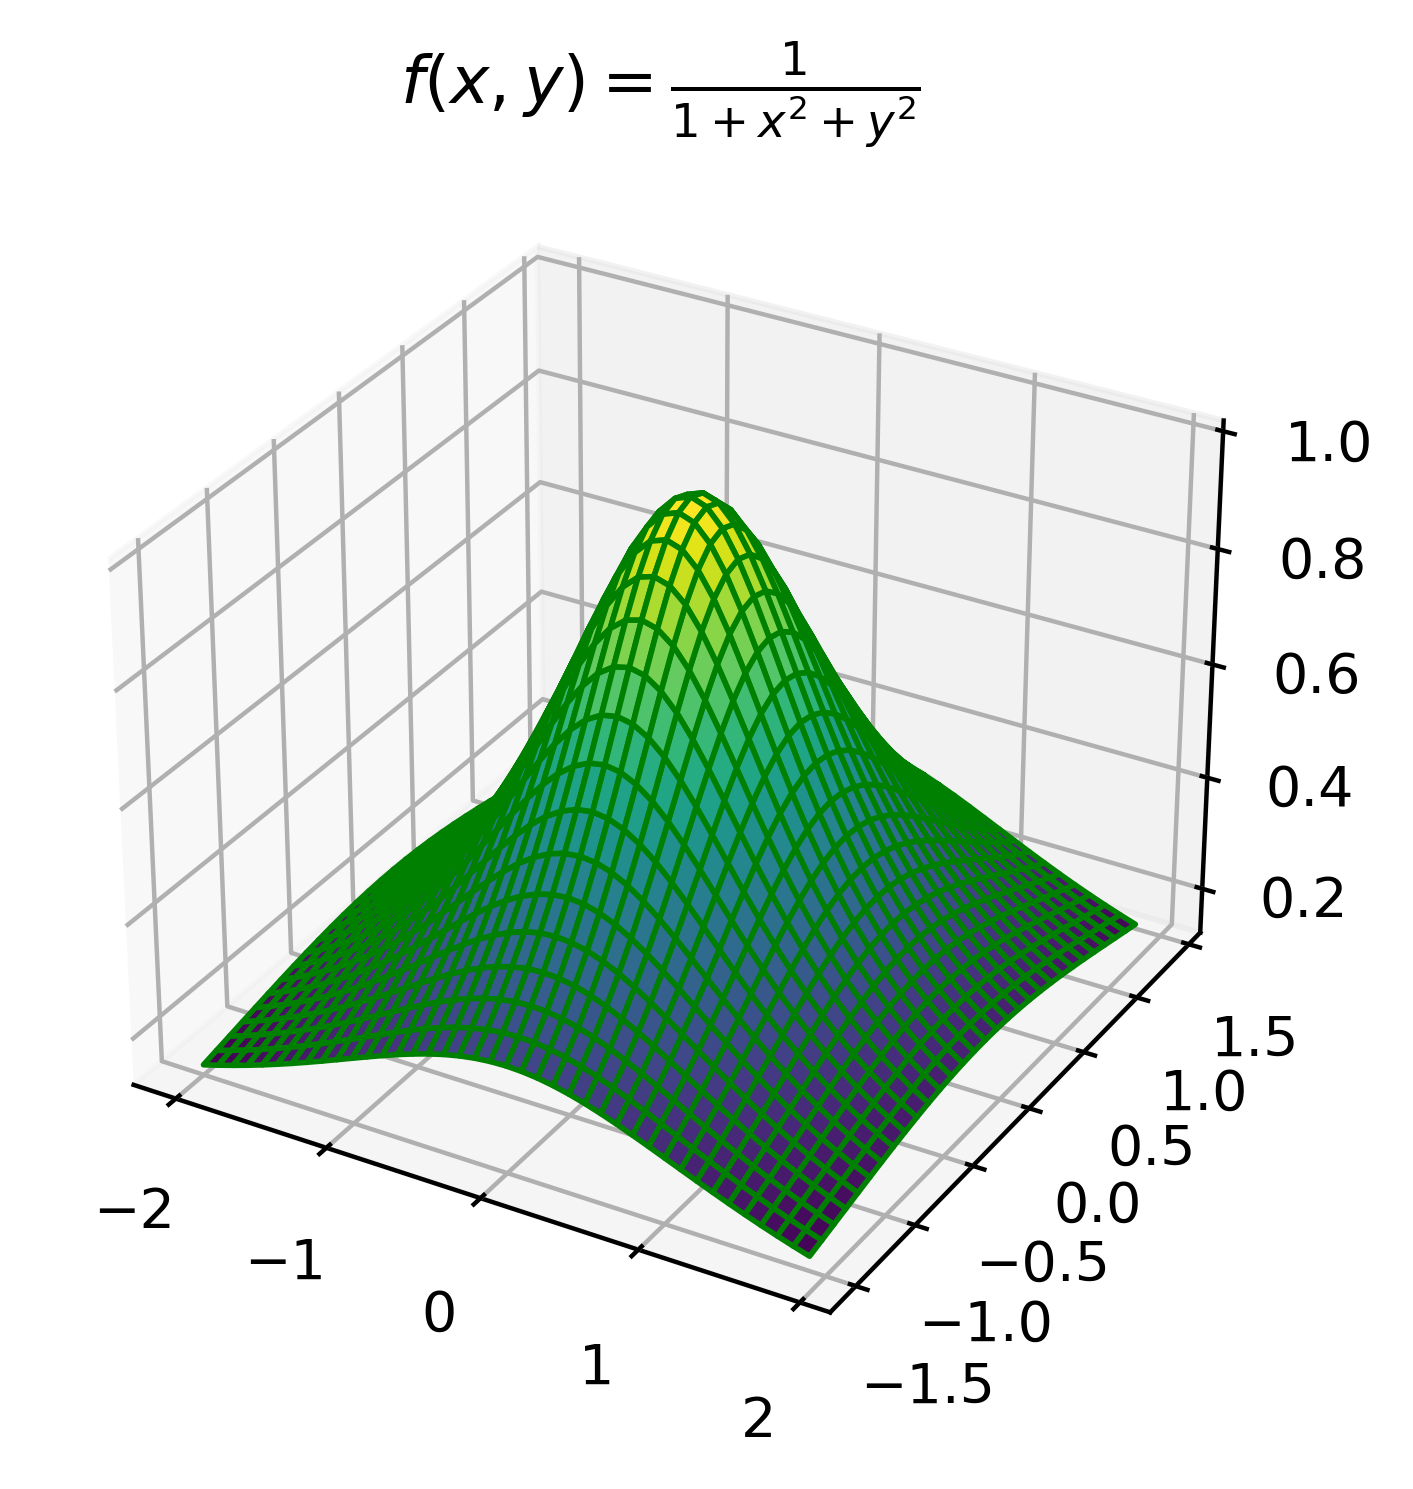

In [429]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-2,2,.1)
Y = np.arange(-1.5,1.5,.1)

x,y = np.meshgrid(X,Y)

z = 1/(1+x**2+y**2)
fig = plt.figure(figsize=(4,5), dpi=400)
ax = plt.axes(projection ='3d')
ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green')
ax.set_title('$f(x,y)=\\frac{1}{1+x^{2}+y^{2}}$')
plt.show()

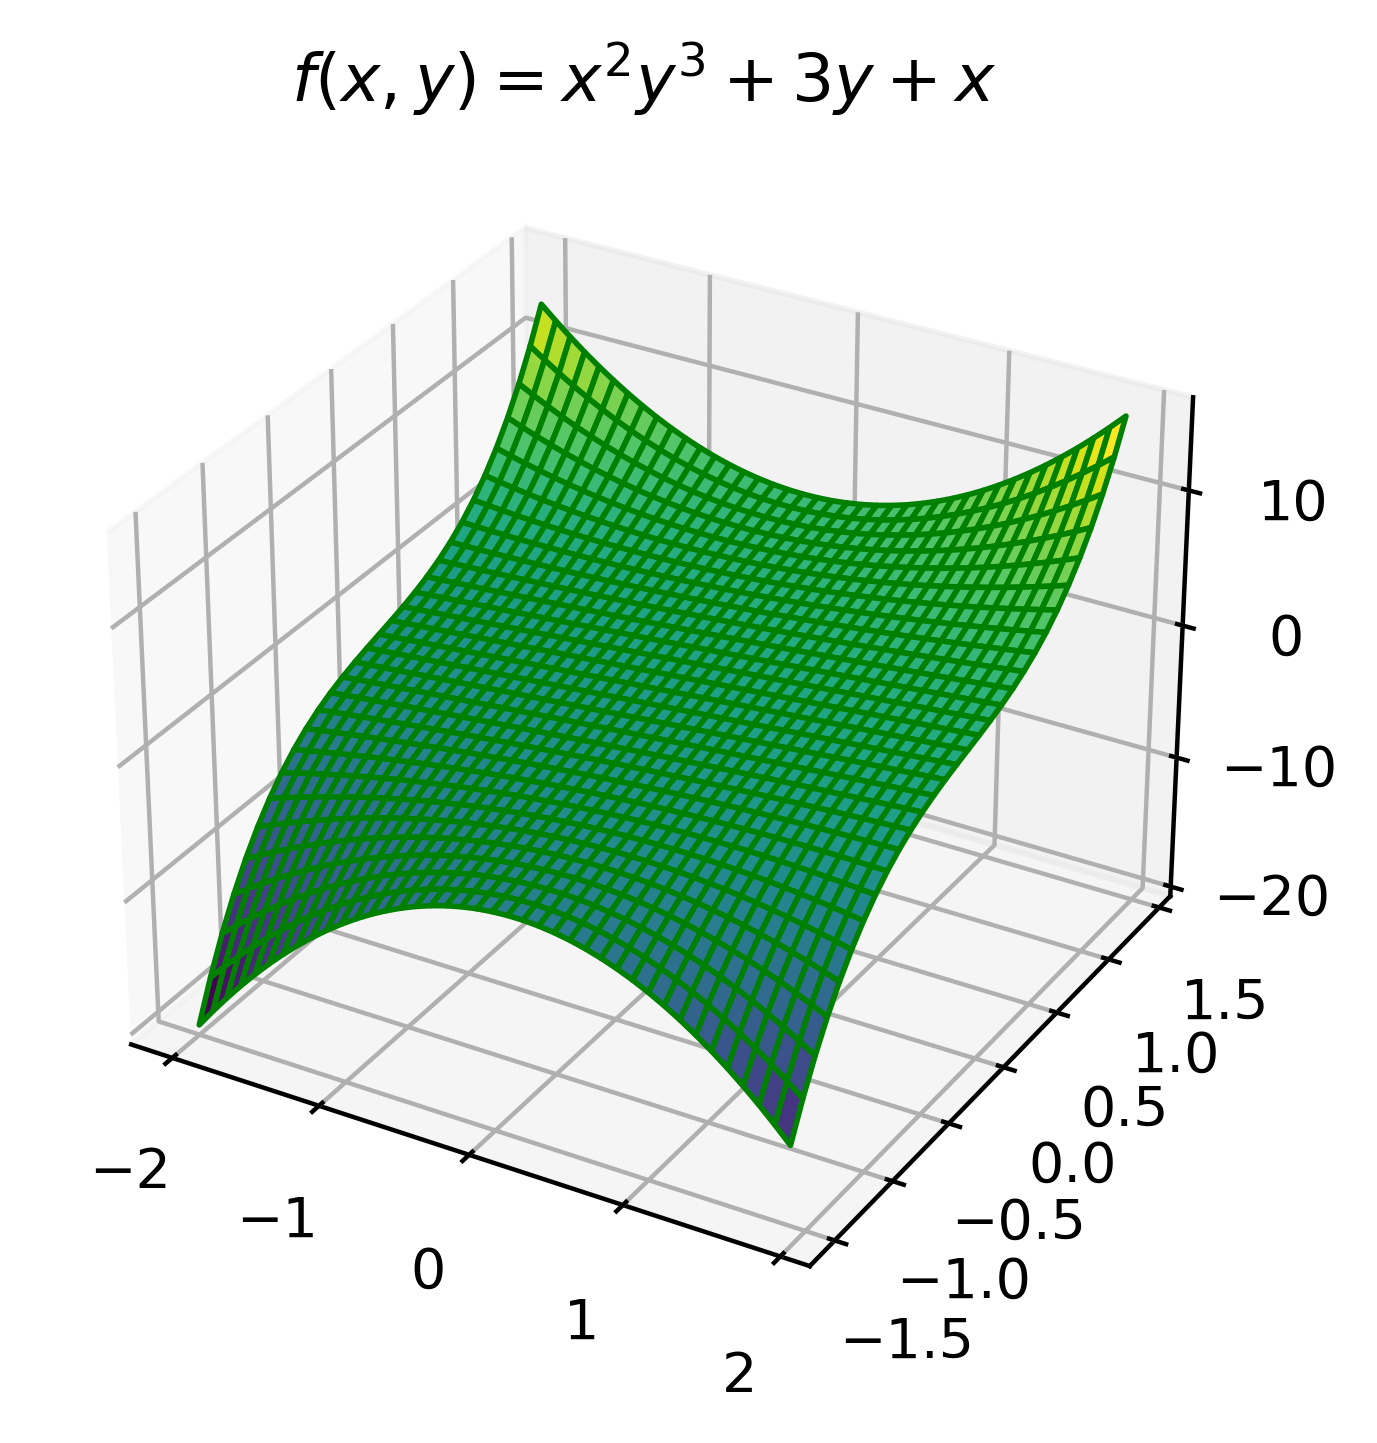

In [430]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-2,2,.1)
Y = np.arange(-1.5,1.5,.1)

x,y = np.meshgrid(X,Y)

z = x**2*y**3 + 3*y + x
fig = plt.figure(figsize=(4,4), dpi=400)
ax = plt.axes(projection ='3d')
ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green')
ax.set_title('$f(x,y)=x^2y^3+3y+x$')
plt.show()